In [1]:
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py

# pixel size
h = 0.7
pix_size = 1.16 * u.kpc / h

# Units of fuzzy dark matter density
rho = 10**10 * h**2 * u.solMass/(u.kpc)**3

In [2]:
def find_mass(fdm_3d_density):
    L = np.shape(fdm_3d_density)[0]
    R_200 = L/4
    ctr = L/2
    
    mass = 0
    
    # Now, we want to compute the mass within this radius.
    for i in range(L):
        for j in range(L):
            for k in range(L):
                                            
                dist_to_ctr = np.sqrt((i-ctr)**2 + (j-ctr)**2 + (k-ctr)**2)
                
                # If distance to center is less than R_200, we add up the density in this pixel.
                
                if dist_to_ctr < R_200:
                    
                    mass += fdm_3d_density[i][j][k] 
    
    # Fixing the mass units
    mass = mass * rho * (pix_size)**3
    
    return mass

(251, 251, 251)


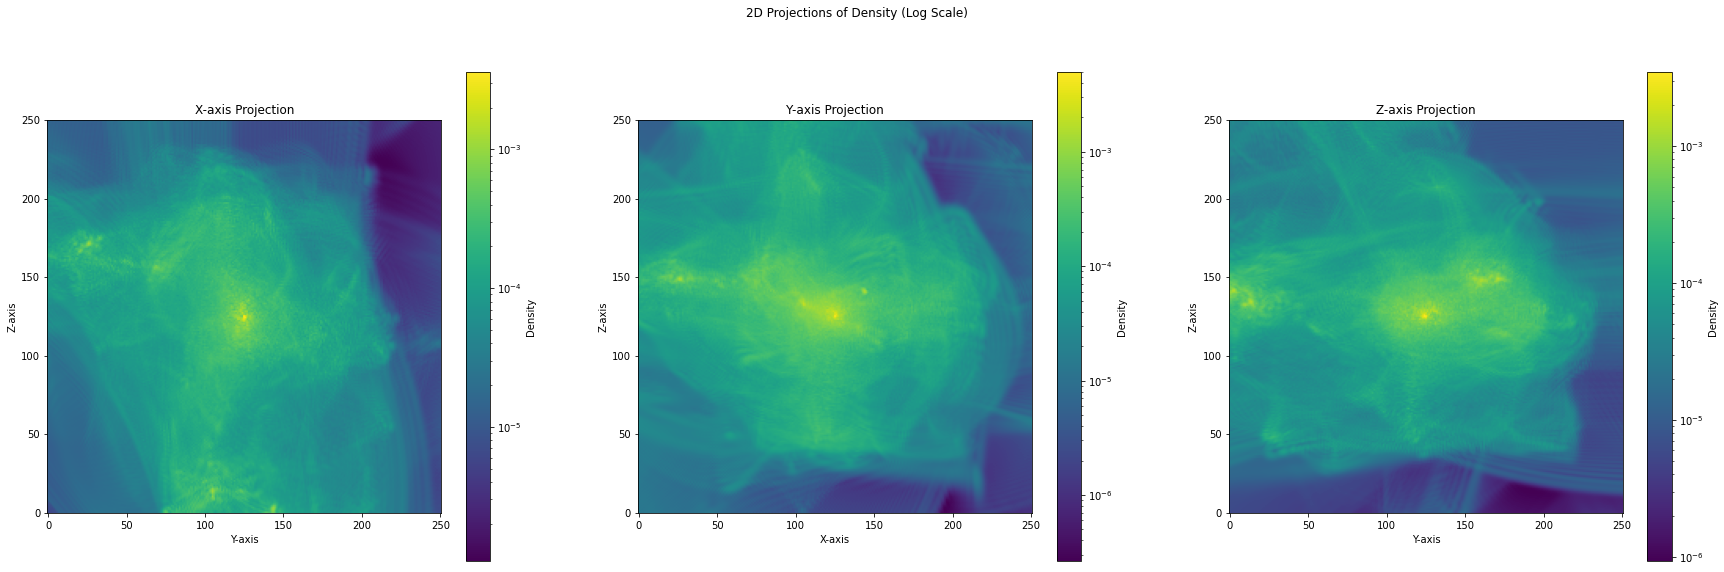

In [3]:
# Path to the HDF5 file
file_path = "fdm-ic_p4320_b10000_m3.5e-23/density_halo_0.hdf5"

def get_data(file_path):
    
    with h5py.File(file_path, "r") as f:
        dataset = f["FuzzyDM/DENSITY"]
        fdm_density = np.array(dataset)
        print(np.shape(fdm_density))
        
    return fdm_density

def get_projections(fdm_density):

    # Create simple 2D projections along x, y, and z axes
    x_proj = np.sum(fdm_density, axis=0)
    y_proj = np.sum(fdm_density, axis=1)
    z_proj = np.sum(fdm_density, axis=2)
        
    return x_proj, y_proj, z_proj


def plot_2d_projections(x_proj, y_proj, z_proj):

    f, ax = plt.subplots(1, 3, figsize=(30, 9))
    ax[0].imshow(x_proj, cmap='viridis', origin='lower', norm=LogNorm())
    ax[1].imshow(y_proj, cmap='viridis', origin='lower', norm=LogNorm())
    ax[2].imshow(z_proj, cmap='viridis', origin='lower', norm=LogNorm())

    # Add colorbars and labels
    cbar = f.colorbar(ax[0].imshow(x_proj, cmap='viridis', origin='lower', norm=LogNorm()), ax=ax[0])
    cbar.set_label('Density')
    ax[0].set_title('X-axis Projection')
    ax[0].set_xlabel('Y-axis')
    ax[0].set_ylabel('Z-axis')

    cbar = f.colorbar(ax[1].imshow(y_proj, cmap='viridis', origin='lower', norm=LogNorm()), ax=ax[1])
    cbar.set_label('Density')
    ax[1].set_title('Y-axis Projection')
    ax[1].set_xlabel('X-axis')
    ax[1].set_ylabel('Z-axis')

    cbar = f.colorbar(ax[2].imshow(z_proj, cmap='viridis', origin='lower', norm=LogNorm()), ax=ax[2])
    cbar.set_label('Density')
    ax[2].set_title('Z-axis Projection')
    ax[2].set_xlabel('Y-axis')
    ax[2].set_ylabel('Z-axis')

    plt.suptitle('2D Projections of Density (Log Scale)')
    plt.show()

fdm_density = get_data(file_path)
    
x_proj, y_proj, z_proj = get_projections(fdm_density)

plot_2d_projections(x_proj, y_proj, z_proj)

M_200 = find_mass(fdm_density)

In [5]:
print(f"{M_200:.3e}")

3.831e+10 solMass
